In [2]:
## IMPORTACIÓN DE LIBRERÍAS

import pandas as pd # Pandas
import matplotlib.pyplot as plt # Matplorlib
import matplotlib.colors as mcolors # Matplorlib
import matplotlib.dates as mdates
#from dateutil.relativedelta import relativedelta # Dates
#import seaborn as sns #Seaborn
import numpy as np #Numpy
from matplotlib.colors import LinearSegmentedColormap #Paleta de colores
import pycaret
#from pycaret.regression import *
from prophet import Prophet
from pycaret.regression import save_model
from pycaret.regression import load_model
# Desactivamos Warnings
import warnings
warnings.filterwarnings('ignore')
from pycaret.regression import setup, compare_models
from sklearn.model_selection import TimeSeriesSplit
#from pycaret.clustering import *
from pycaret.regression import setup
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import ensemble_model



In [3]:
df_completo = pd.read_csv('df_merged.csv')

In [4]:
df_completo

,ID_tienda,Fecha_venta,ID_producto,Cant_vendidas,Facturacion,Precio_unidad,Dia_sem,Status,ID_proveedor,Categoria,Clasif_proveedor,Promocion,Año,Mes,Lag_1,Rolling_Mean_7,Rolling_Std_7,Dia_del_Mes,Cluster
0,5201,2021-05-08,561818,6,1488.0,248.0,Sábado,1,65987,216,1,No,2021,5,10.0,4.857143,3.023716,8,3
1,5201,2021-05-08,562189,4,1076.0,269.0,Sábado,1,10214,216,1,No,2021,5,5.0,3.714286,1.799471,8,3
2,5201,2021-05-08,560779,36,9684.0,269.0,Sábado,1,10214,216,1,No,2021,5,9.0,13.714286,10.387722,8,1
3,5201,2021-05-08,560576,6,1614.0,269.0,Sábado,1,10214,216,1,No,2021,5,3.0,2.571429,1.718249,8,3
4,5201,2021-05-08,604216,2,458.0,229.0,Sábado,1,10214,216,1,No,2021,5,3.0,2.142857,0.690066,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113249,5201,2024-04-30,600889,1,270.0,270.0,Martes,1,10145,216,1,No,2024,4,1.0,1.571429,1.133893,30,0
113250,5201,2024-04-30,600917,4,2320.0,580.0,Martes,1,10145,216,1,No,2024,4,1.0,1.428571,1.133893,30,0
113251,5201,2024-04-30,600918,1,580.0,580.0,Martes,1,10145,216,1,No,2024,4,1.0,1.142857,0.377964,30,0
113252,5201,2024-04-30,600922,1,379.0,379.0,Martes,1,10214,216,1,No,2024,4,1.0,2.000000,2.236068,30,0


In [5]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113254 entries, 0 to 113253
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID_tienda         113254 non-null  int64  
 1   Fecha_venta       113254 non-null  object 
 2   ID_producto       113254 non-null  int64  
 3   Cant_vendidas     113254 non-null  int64  
 4   Facturacion       113254 non-null  float64
 5   Precio_unidad     113254 non-null  float64
 6   Dia_sem           113254 non-null  object 
 7   Status            113254 non-null  int64  
 8   ID_proveedor      113254 non-null  int64  
 9   Categoria         113254 non-null  int64  
 10  Clasif_proveedor  113254 non-null  int64  
 11  Promocion         113254 non-null  object 
 12  Año               113254 non-null  int64  
 13  Mes               113254 non-null  int64  
 14  Lag_1             113254 non-null  float64
 15  Rolling_Mean_7    113254 non-null  float64
 16  Rolling_Std_7     11

In [6]:
#Convertimos variables en el tipo correspondiente

df_completo['ID_tienda'] = df_completo['ID_tienda'].astype(object)
df_completo['Fecha_venta'] = pd.to_datetime(df_completo['Fecha_venta'])
df_completo['ID_producto'] = df_completo['ID_producto'].astype(object)
df_completo['Status'] = df_completo['Status'].astype(object)
df_completo['ID_proveedor'] = df_completo['ID_proveedor'].astype(object)
df_completo['Categoria'] = df_completo['Categoria'].astype(object)
df_completo['Clasif_proveedor'] = df_completo['Clasif_proveedor'].astype(object)
df_completo['Año'] = df_completo['Año'].astype(object)
df_completo['Mes'] = df_completo['Mes'].astype(object)
df_completo['Dia_del_Mes'] = df_completo['Dia_del_Mes'].astype(object)
df_completo['Cluster'] = df_completo['Cluster'].astype(object)


In [7]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113254 entries, 0 to 113253
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID_tienda         113254 non-null  object        
 1   Fecha_venta       113254 non-null  datetime64[ns]
 2   ID_producto       113254 non-null  object        
 3   Cant_vendidas     113254 non-null  int64         
 4   Facturacion       113254 non-null  float64       
 5   Precio_unidad     113254 non-null  float64       
 6   Dia_sem           113254 non-null  object        
 7   Status            113254 non-null  object        
 8   ID_proveedor      113254 non-null  object        
 9   Categoria         113254 non-null  object        
 10  Clasif_proveedor  113254 non-null  object        
 11  Promocion         113254 non-null  object        
 12  Año               113254 non-null  object        
 13  Mes               113254 non-null  object        
 14  Lag_

In [8]:
# Filtrar datos para cada cluster
cluster_0 = df_completo[df_completo['Cluster'] == 0]
cluster_1 = df_completo[df_completo['Cluster'] == 1]
cluster_2 = df_completo[df_completo['Cluster'] == 2]
cluster_3 = df_completo[df_completo['Cluster'] == 3]

In [9]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72791 entries, 4 to 113253
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_tienda         72791 non-null  object        
 1   Fecha_venta       72791 non-null  datetime64[ns]
 2   ID_producto       72791 non-null  object        
 3   Cant_vendidas     72791 non-null  int64         
 4   Facturacion       72791 non-null  float64       
 5   Precio_unidad     72791 non-null  float64       
 6   Dia_sem           72791 non-null  object        
 7   Status            72791 non-null  object        
 8   ID_proveedor      72791 non-null  object        
 9   Categoria         72791 non-null  object        
 10  Clasif_proveedor  72791 non-null  object        
 11  Promocion         72791 non-null  object        
 12  Año               72791 non-null  object        
 13  Mes               72791 non-null  object        
 14  Lag_1             72791 no

In [10]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4851 entries, 2 to 113219
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_tienda         4851 non-null   object        
 1   Fecha_venta       4851 non-null   datetime64[ns]
 2   ID_producto       4851 non-null   object        
 3   Cant_vendidas     4851 non-null   int64         
 4   Facturacion       4851 non-null   float64       
 5   Precio_unidad     4851 non-null   float64       
 6   Dia_sem           4851 non-null   object        
 7   Status            4851 non-null   object        
 8   ID_proveedor      4851 non-null   object        
 9   Categoria         4851 non-null   object        
 10  Clasif_proveedor  4851 non-null   object        
 11  Promocion         4851 non-null   object        
 12  Año               4851 non-null   object        
 13  Mes               4851 non-null   object        
 14  Lag_1             4851 non-

In [11]:
cluster_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_tienda         0 non-null      object        
 1   Fecha_venta       0 non-null      datetime64[ns]
 2   ID_producto       0 non-null      object        
 3   Cant_vendidas     0 non-null      int64         
 4   Facturacion       0 non-null      float64       
 5   Precio_unidad     0 non-null      float64       
 6   Dia_sem           0 non-null      object        
 7   Status            0 non-null      object        
 8   ID_proveedor      0 non-null      object        
 9   Categoria         0 non-null      object        
 10  Clasif_proveedor  0 non-null      object        
 11  Promocion         0 non-null      object        
 12  Año               0 non-null      object        
 13  Mes               0 non-null      object        
 14  Lag_1             0 non-null      float64  

In [12]:
cluster_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35612 entries, 0 to 113248
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_tienda         35612 non-null  object        
 1   Fecha_venta       35612 non-null  datetime64[ns]
 2   ID_producto       35612 non-null  object        
 3   Cant_vendidas     35612 non-null  int64         
 4   Facturacion       35612 non-null  float64       
 5   Precio_unidad     35612 non-null  float64       
 6   Dia_sem           35612 non-null  object        
 7   Status            35612 non-null  object        
 8   ID_proveedor      35612 non-null  object        
 9   Categoria         35612 non-null  object        
 10  Clasif_proveedor  35612 non-null  object        
 11  Promocion         35612 non-null  object        
 12  Año               35612 non-null  object        
 13  Mes               35612 non-null  object        
 14  Lag_1             35612 no

In [13]:
#Configuración de PyCaret
#Carga de datos en un DataFrame de pandas y configuramos entorno de PyCaret. 
#Se saca Date, pues ni pycaret ni los modelos propuestos estan optimizados para trabajar con fechas,
#Series Temporales, por lo tanto a priori es retirada.


reg = setup(data=cluster_0, target='Cant_vendidas', session_id=123,
            ignore_features=['Fecha_venta', 'Status', 'ID_tienda', 'ID_proveedor', 'Facturacion', 'Clasif_proveedor', 'Cluster', 'Semana_del_año'],
            categorical_features=['ID_producto', 'Categoria', 'Promocion', 'Dia_sem', 'Mes', 'Dia_del_Mes'],
            numeric_features=['Precio_unidad', 'Lag_1', 'Rolling_Mean_7', 'Rolling_Std_7'],
            normalize=True, transformation=True,
            #transform_target=True,  # Puedes descomentar y especificar el método si lo deseas, por ejemplo, transform_target_method='box-cox'
            #imputation_type='iterative',
            fold_strategy='timeseries',
            fold=5,
            data_split_shuffle=False,
            #silent=True,
            #profile=False,
            remove_outliers=True)
          

,Description,Value
0,Session id,123
1,Target,Cant_vendidas
2,Target type,Regression
3,Original data shape,"(72791, 19)"
4,Transformed data shape,"(70243, 29)"
5,Transformed train set shape,"(48405, 29)"
6,Transformed test set shape,"(21838, 29)"
7,Ignore features,8
8,Numeric features,4
9,Categorical features,6


In [14]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.3003,11.4732,3.0063,0.2545,0.3798,0.5969,2.2960
et,Extra Trees Regressor,1.2888,11.5796,3.0271,0.2406,0.3798,0.5846,0.4460
gbr,Gradient Boosting Regressor,1.3097,11.5790,3.0212,0.2385,0.3760,0.6063,1.0980
rf,Random Forest Regressor,1.3187,11.7500,3.0503,0.2114,0.3862,0.6240,0.4900
lightgbm,Light Gradient Boosting Machine,1.3104,12.1634,3.1031,0.2076,0.3852,0.5857,0.3720
ada,AdaBoost Regressor,1.5115,13.2982,3.1838,0.1960,0.4186,0.8169,0.6040
xgboost,Extreme Gradient Boosting,1.3835,13.4478,3.2451,0.1604,0.4063,0.6463,0.4020
lar,Least Angle Regression,1.6671,14.4396,3.3608,0.1386,0.4635,0.8793,0.7120
br,Bayesian Ridge,1.6732,14.4676,3.3646,0.1364,0.4646,0.8876,0.3240
ridge,Ridge Regression,1.6728,14.4722,3.3652,0.1361,0.4648,0.8865,0.7520


In [15]:
#Ensamblaje tipo Boosting
boosted_model = ensemble_model(best_model, method='Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6427,13.7082,3.7025,-0.0478,0.5475,1.0766
1,1.4103,10.3666,3.2197,0.4081,0.4158,0.5206
2,2.0388,22.6787,4.7622,0.3460,0.5507,1.0111
3,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
4,1.6420,12.1707,3.4887,0.5240,0.4316,0.6533
Mean,1.3467,11.7849,3.0346,0.2461,0.3891,0.6523
Std,0.7031,7.2584,1.6050,0.2282,0.2025,0.3877


In [16]:
# Ensamble usando bagging
bagged_dt = ensemble_model(best_model, method='Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5050,12.0069,3.4651,0.0822,0.5144,0.9434
1,1.3933,11.0842,3.3293,0.3672,0.4156,0.4622
2,1.9013,20.0754,4.4806,0.4211,0.5172,0.9060
3,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
4,1.5697,11.3792,3.3733,0.5549,0.4141,0.5871
Mean,1.2739,10.9091,2.9297,0.2851,0.3723,0.5797
Std,0.6590,6.3951,1.5252,0.2100,0.1915,0.3431


In [17]:
from pycaret.regression import setup, create_model
RandomForest = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.7167,16.6167,4.0764,-0.2701,0.5697,1.1161
1,1.4520,11.9663,3.4592,0.3168,0.4308,0.5081
2,1.8330,18.5270,4.3043,0.4657,0.5052,0.8728
3,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
4,1.5918,11.6398,3.4117,0.5448,0.4252,0.6230
Mean,1.3187,11.7500,3.0503,0.2114,0.3862,0.6240
Std,0.6715,6.4457,1.5638,0.3045,0.2003,0.3760


In [21]:
# Stacking models
from pycaret.regression import setup, create_model, stack_models
# Stacking de modelos utilizando 'estimator_list' en lugar de 'estimators'
stacked_model = stack_models(estimator_list=[best_model, RandomForest], meta_model=None)  # PyCaret selecciona un meta-modelo por defecto

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6440,13.0140,3.6075,0.0052,0.5365,1.0930
1,1.5252,11.7952,3.4344,0.3266,0.4329,0.5821
2,1.9288,18.5227,4.3038,0.4659,0.5248,0.9948
3,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
4,1.6085,11.5145,3.3933,0.5497,0.4251,0.6483
Mean,1.3413,10.9693,2.9478,0.2695,0.3838,0.6636
Std,0.6843,6.0422,1.5099,0.2292,0.1973,0.3850


In [20]:
from pycaret.regression import setup, tune_model
tuned_model = tune_model(best_model)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.4799,15.2959,3.9110,-0.1692,0.7270,1.8393
1,2.2524,17.5101,4.1845,0.0003,0.6331,1.1375
2,2.5586,34.9378,5.9108,-0.0075,0.6704,1.0745
3,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
4,2.4744,26.2866,5.1270,-0.0281,0.6608,0.9284
Mean,1.9531,18.8061,3.8267,-0.0409,0.5383,0.9960
Std,0.9818,11.6950,2.0403,0.0650,0.2709,0.5889


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
from pycaret.regression import setup, evaluate_model
evaluate_model(bagged_dt)

In [43]:
# Función para obtener el último precio basado en la promoción
def ultimo_precio(ID_producto, en_promocion):
    # Filtra por ID de producto
    producto_data = data[data['ID_producto'] == ID_producto]
    
    # Verifica si quieres el precio en promoción o no
    if en_promocion:
        # Filtra por productos que estaban en promoción
        promocion_data = producto_data[producto_data['Promocion'] == 'Si']
    else:
        # Filtra por productos que no estaban en promoción
        promocion_data = producto_data[producto_data['Promocion'] == 'No']

    # Verifica si hay datos disponibles
    if not promocion_data.empty:
        # Ordena los datos por fecha
        promocion_data = promocion_data.sort_values('Fecha_venta', ascending=False)
        # Devuelve el último precio unitario registrado
        return promocion_data.iloc[0]['Precio_unidad']
    else:
        return "No hay datos disponibles para este producto con los criterios especificados."


In [ ]:
# Ejemplo de uso
ID_producto = int(input("Ingresa el ID del producto: "))
en_promocion = input("¿El producto estaba en promoción? (Sí/No): ").strip().capitalize() == 'Sí'

ultimo_precio_encontrado = ultimo_precio(ID_producto, en_promocion)
print(f"El último precio del producto {ID_producto} {'en promoción' if en_promocion else 'sin promoción'} es: {ultimo_precio_encontrado}")

In [36]:
from pycaret.regression import setup, predict_model
predictions = predict_model(bagged_dt, data=cluster_0)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,1.1731,8.7996,2.9664,0.6249,0.3606,0.5213


In [30]:
#Exportar el DataFrame a un archivo CSV
predictions.to_csv('predictions_cluster0.csv', index=False) 


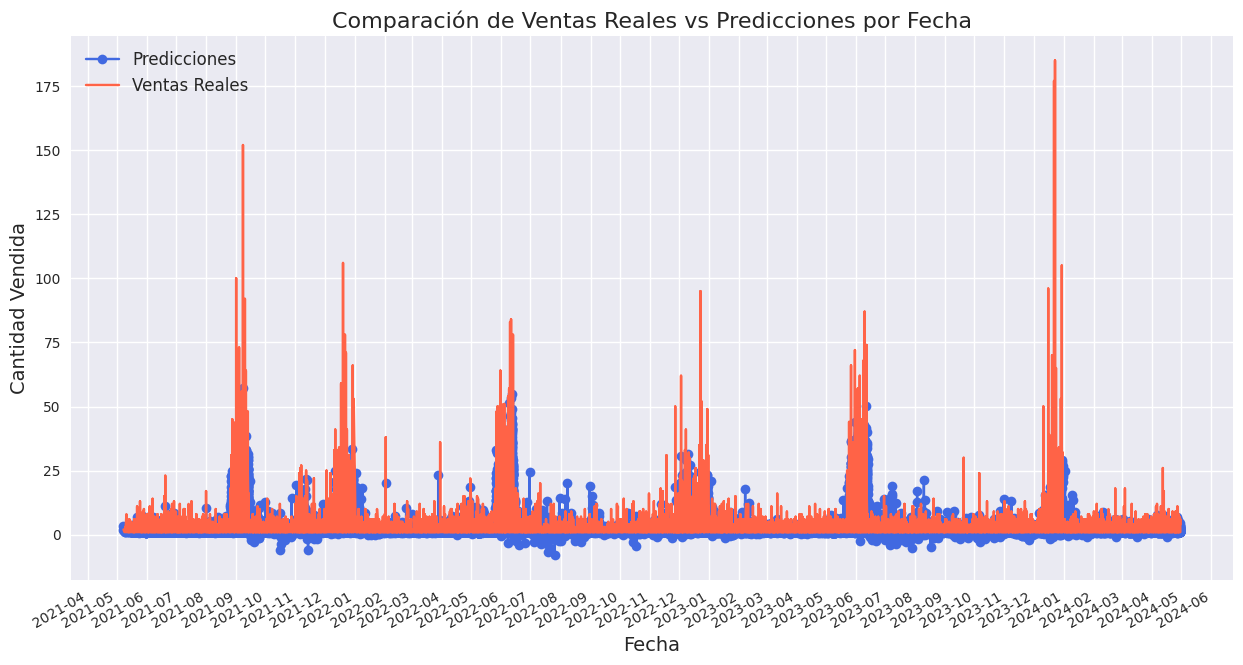

In [25]:
plt.figure(figsize=(15, 8))  # Tamaño del gráfico
plt.style.use('seaborn-darkgrid')  # Estilo de fondo de cuadrícula con tema oscuro

# Gráfico de predicciones
plt.plot(predictions['Fecha_venta'], predictions['prediction_label'], label='Predicciones', marker='o', linestyle='-', color='royalblue')

# Gráfico de ventas reales
plt.plot(cluster_0['Fecha_venta'], cluster_0['Cant_vendidas'], label='Ventas Reales', marker='x', linestyle='-', color='tomato')

# Configuración de los formatos de fecha en el eje X
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Intervalo mensual
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato año-mes

plt.title('Comparación de Ventas Reales vs Predicciones por Fecha', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad Vendida', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Mejorar la rotación y alineación de las etiquetas de fecha
plt.gcf().autofmt_xdate()

plt.savefig('high_quality_chart.png', dpi=300)  # Guardar como imagen de alta calidad
plt.show()

In [38]:
future_dates = pd.date_range(start = cluster_0['Fecha_venta'].max(), periods = 16,  freq='D')
future_df = pd.DataFrame({'Fecha_venta': future_dates})

# Añade otras características necesarias al futuro DataFrame

# Asegúrate de que el DataFrame futuro tenga el mismo formato que tus datos de entrenamiento


In [39]:
future_df

,Fecha_venta
0,2024-04-30
1,2024-05-01
2,2024-05-02
3,2024-05-03
4,2024-05-04
5,2024-05-05
6,2024-05-06
7,2024-05-07
8,2024-05-08
9,2024-05-09
